<a href="https://colab.research.google.com/github/renatagomezc/Regresion-Lineal/blob/main/California_Actividad_6_2_(Regresi%C3%B3n_Lineal_M%C3%BAltiple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 6.2 (Regresión Lineal Múltiple) California**

*Integrantes*
- Paola Plascencia Rey
- Nicole Aryam Rodriguez 
- Renata Pilar Gómez Castillo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df= pd.read_csv('Cali_limpio.csv',index_col=0)
df.head()

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169,1.0,1.0,0.0,37.77028,-122.43317,3.0,0.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5858.0,2.020000e+13,8904,2.0,2.0,0.0,37.74474,-122.42089,4.0,0.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,--,f
2,8142.0,2.020000e+13,21994,13.0,14.0,0.0,37.76555,-122.45213,1.0,0.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,--,f
3,8339.0,2.020000e+13,24215,2.0,6.0,0.0,37.77564,-122.43642,4.0,0.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,8739.0,2.020000e+13,7149,2.0,2.0,0.0,37.76030,-122.42197,3.0,0.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


**Valores Nulos y outliers**

In [18]:
df.isnull().sum().sum()

0

Estamos usando data ya procesada, por lo que los valores nulos y outliers ya fueron tratados

##**Entire home/Apt**

In [20]:
entire=df[df['room_type']=='Entire home/apt']

In [21]:
y_e = []
x1_e=[]
x2_e = []
x3_e = []
x4_e = []
deter_e=[]
corr_e=[]

###**host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

In [22]:
data = entire

In [23]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)


<ipython-input-23-1c2dc9575a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-23-1c2dc9575a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-23-1c2dc9575a21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [24]:
y = data[['host_acceptance_rate']]
x1 = data[['host_response_rate']]
x2 = data[['price']]
x3 = data[['number_of_reviews']]
x4 = data[['review_scores_rating']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

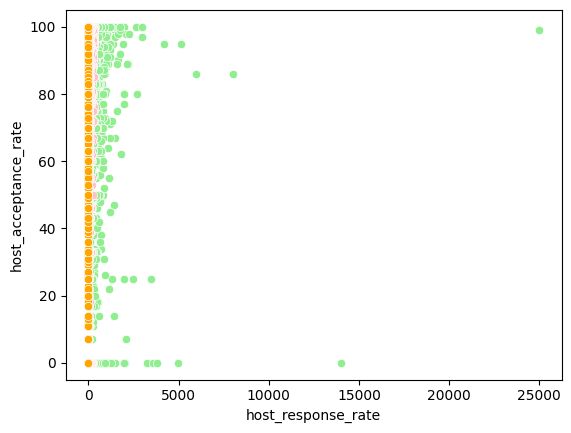

In [25]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [26]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [27]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [28]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [29]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [30]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ 5.59616204e-01, -7.06771860e-04,  3.72996241e-02,
          2.23190389e+00]]),
 'rank_': 4,
 'singular_': array([35440.46831655,  3916.25553151,  2334.42765394,   123.49603219]),
 'intercept_': array([22.06247899])}

####**Modelo matemático**

Modelo matemático: y= 5.59616204e-01x1 + -7.06771860e-04x2 +  3.72996241e-02x3 + 2.23190389e+00x4 + 22.06247899

In [31]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[88.75070344],
       [81.69763319],
       [89.53146701],
       ...,
       [77.90818883],
       [33.09815408],
       [77.75905996]])

In [32]:
#Insertamos la columna de predicciones en el DataFrame

data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-32-0fbb012ffc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,Predicciones
0,100.0,202.0,0.0,4.87,100.0,88.750703
1,80.0,235.0,111.0,4.88,71.0,81.697633
3,100.0,575.0,28.0,4.87,0.0,89.531467
5,100.0,259.0,234.0,4.91,95.0,97.527806
8,100.0,425.0,56.0,4.85,61.0,90.637234
...,...,...,...,...,...,...
6923,100.0,110.0,0.0,0.00,100.0,77.946355
6928,100.0,175.0,0.0,0.00,0.0,77.900414
6931,100.0,164.0,0.0,0.00,100.0,77.908189
6932,0.0,228.0,1.0,5.00,0.0,33.098154


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

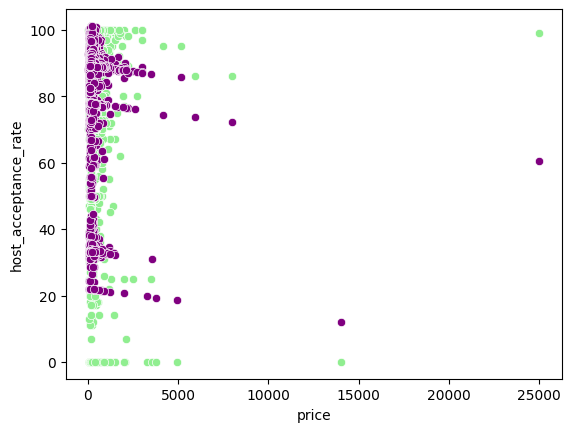

In [33]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [34]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [35]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.4214940283666663

In [36]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.6492257144989455

###**Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

In [37]:
data = entire

In [38]:
data['accommodates'] = data['accommodates'].astype(float)

<ipython-input-38-0c4d7e569382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['accommodates'] = data['accommodates'].astype(float)


In [39]:
y = data[['price']]
x1 = data[['availability_365']]
x2 = data[['host_response_rate']]
x3 = data[['number_of_reviews']]
x4 = data[['accommodates']]

<Axes: xlabel='availability_365', ylabel='price'>

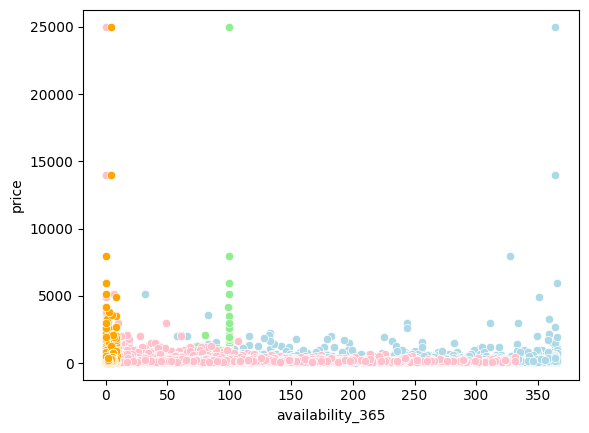

In [40]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [43]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ 0.12049762, -0.37916807, -0.29679773, 43.2215394 ]]),
 'rank_': 4,
 'singular_': array([8358.59794929, 3896.95262312, 2295.89423421,  117.99529081]),
 'intercept_': array([138.65517293])}

####**Modelo matemático**

Modelo matemático: y=  0.12049762x1 + -0.37916807x2 + -0.29679773x3 + 43.2215394x4  + 138.65517293

In [46]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[245.82667879],
       [292.24496663],
       [309.29581668],
       ...,
       [194.04980868],
       [267.69860515],
       [231.04257666]])

In [47]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-47-9a0fc1fe72ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,host_response_rate,number_of_reviews,accommodates,price,Predicciones
0,128,100.0,0.0,3.0,202.0,245.826679
1,365,80.0,111.0,4.0,235.0,292.244967
3,365,100.0,28.0,4.0,575.0,309.295817
5,32,100.0,234.0,4.0,259.0,208.029779
8,7,100.0,56.0,5.0,425.0,301.068873
...,...,...,...,...,...,...
6923,26,100.0,0.0,2.0,110.0,190.314383
6928,248,100.0,0.0,3.0,175.0,260.286393
6931,57,100.0,0.0,2.0,164.0,194.049809
6932,356,0.0,1.0,2.0,228.0,267.698605


<Axes: xlabel='host_response_rate', ylabel='price'>

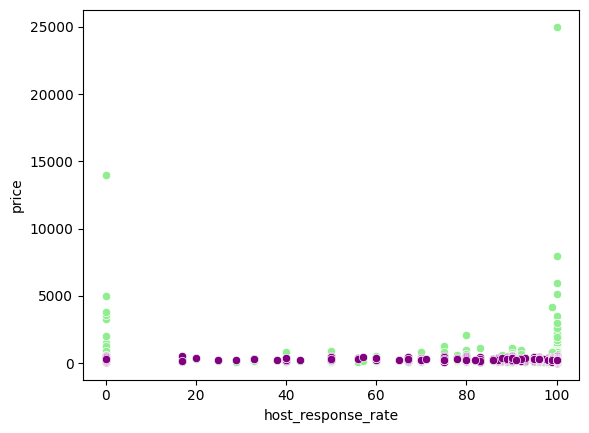

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [49]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [50]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.023031837536142352

In [51]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.15176243783012433

###**host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

In [52]:
data = entire

In [53]:
y = data[['host_acceptance_rate']]
x1 = data[['number_of_reviews']]
x2 = data[['review_scores_cleanliness']]
x3 = data[['review_scores_communication']]
x4 = '--'

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

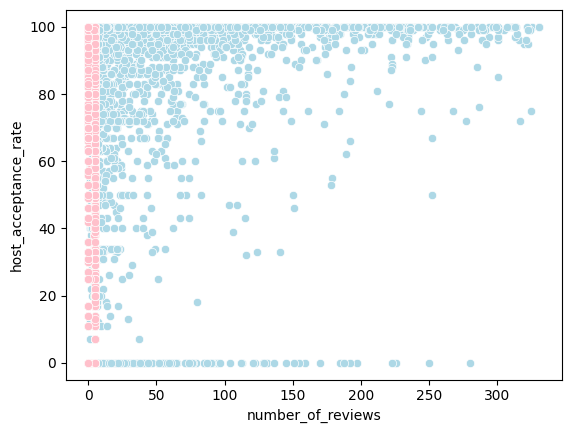

In [54]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)

In [55]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0]]]
Var_Dep= y

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [57]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[ 0.05513255,  3.35387588, -0.02518948]]),
 'rank_': 3,
 'singular_': array([3911.656014  ,  176.12055175,   14.73268763]),
 'intercept_': array([63.93111035])}

####**Modelo matemático**

Modelo matemático: y=  0.05513255x1 +  3.35387588x2 + -0.02518948x3 + 63.93111035

In [60]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0]]])
y_pred

array([[80.30925502],
       [86.26202996],
       [82.11825375],
       ...,
       [63.93111035],
       [80.6296749 ],
       [63.93111035]])

In [61]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],y.columns[0],'Predicciones']]


<ipython-input-61-d9a4cba03580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,review_scores_cleanliness,review_scores_communication,host_acceptance_rate,Predicciones
0,0.0,4.92,4.88,100.0,80.309255
1,111.0,4.87,4.85,71.0,86.262030
3,28.0,5.00,5.00,0.0,82.118254
5,234.0,4.88,4.97,95.0,93.073850
8,56.0,4.86,4.91,61.0,83.194690
...,...,...,...,...,...
6923,0.0,0.00,0.00,100.0,63.931110
6928,0.0,0.00,0.00,0.0,63.931110
6931,0.0,0.00,0.00,100.0,63.931110
6932,1.0,5.00,5.00,0.0,80.629675


<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

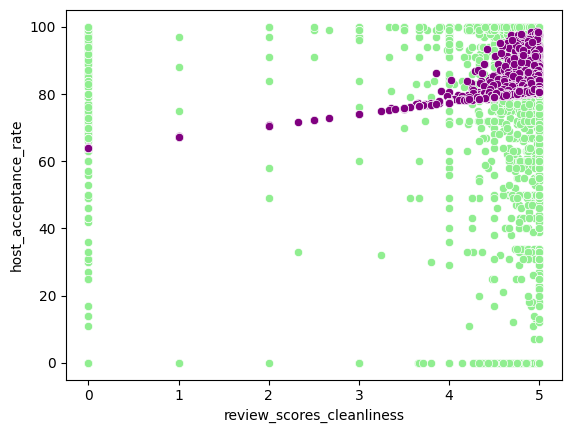

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [63]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4)

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.06097673501413492

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.24693467762575372

##**Private room**

In [66]:
private=df[df['property_type']=='Private room']

###**host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

In [67]:
data = private

In [68]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)


<ipython-input-68-1c2dc9575a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-68-1c2dc9575a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-68-1c2dc9575a21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [69]:
y = data[['host_acceptance_rate']]
x1 = data[['host_response_rate']]
x2 = data[['price']]
x3 = data[['number_of_reviews']]
x4 = data[['review_scores_rating']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

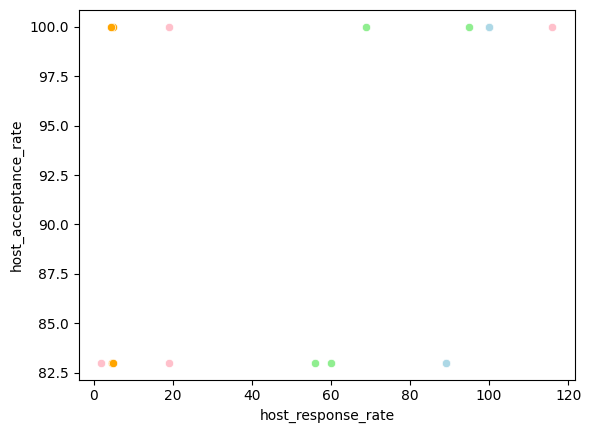

In [70]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [71]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [72]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [73]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [74]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [75]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[1.52781296, 0.00427856, 0.00217882, 0.1641036 ]]),
 'rank_': 3,
 'singular_': array([9.02818518e+01, 3.14300407e+01, 1.61872924e+00, 1.37913428e-15]),
 'intercept_': array([-54.03982818])}

####**Modelo matemático**

Modelo matemático: y= 1.52781296x1 + 0.00427856x2 + 0.00217882x3 + 0.1641036x4 + -54.03982818

In [76]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[100.],
       [100.],
       [ 83.],
       [ 83.]])

In [77]:
#Insertamos la columna de predicciones en el DataFrame

data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-77-0fbb012ffc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,Predicciones
7,100.0,95.0,19.0,4.94,100.0,100.0
1575,100.0,69.0,116.0,4.33,100.0,100.0
2049,89.0,60.0,19.0,4.67,83.0,83.0
4014,89.0,56.0,2.0,5.00,83.0,83.0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

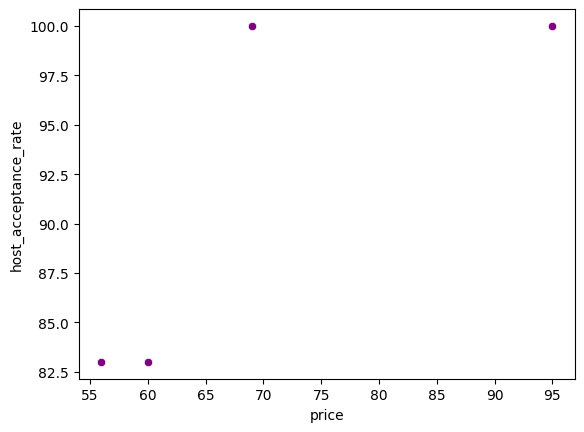

In [78]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [79]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

1.0

In [81]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

1.0

###**Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

In [82]:
data = private

In [83]:
data['accommodates'] = data['accommodates'].astype(float)

<ipython-input-83-0c4d7e569382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['accommodates'] = data['accommodates'].astype(float)


In [84]:
y = data[['price']]
x1 = data[['availability_365']]
x2 = data[['host_response_rate']]
x3 = data[['number_of_reviews']]
x4 = data[['accommodates']]

<Axes: xlabel='availability_365', ylabel='price'>

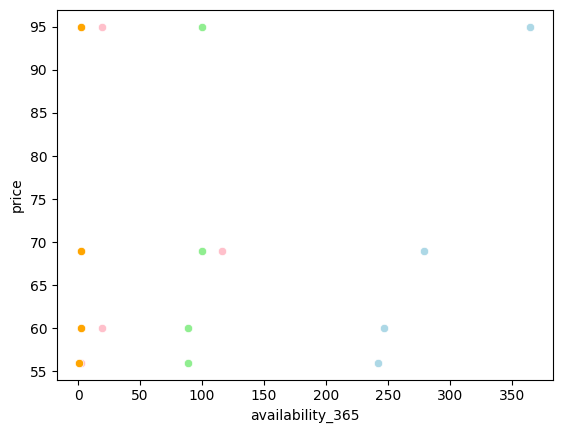

In [85]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [86]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [87]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [88]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [89]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [90]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ 0.39657624, -1.07236332,  0.08356244,  0.59655729]]),
 'rank_': 3,
 'singular_': array([9.92990060e+01, 8.98573832e+01, 1.36311953e+00, 1.90245062e-16]),
 'intercept_': array([54.7052029])}

####**Modelo matemático**

Modelo matemático: y=   0.39657624x1 + -1.07236332x2 +  0.08356244x3 +  0.59655729x4 + 54.7052029

In [91]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[95.],
       [69.],
       [60.],
       [56.]])

In [92]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-92-9a0fc1fe72ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,host_response_rate,number_of_reviews,accommodates,price,Predicciones
7,365,100.0,19.0,2.0,95.0,95.0
1575,279,100.0,116.0,2.0,69.0,69.0
2049,247,89.0,19.0,2.0,60.0,60.0
4014,242,89.0,2.0,1.0,56.0,56.0


<Axes: xlabel='host_response_rate', ylabel='price'>

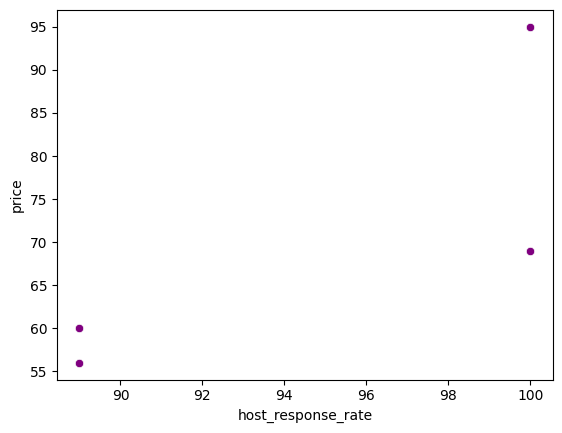

In [93]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [94]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [95]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

1.0

In [96]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

1.0

###**host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

In [97]:
data = private

In [98]:
y = data[['host_acceptance_rate']]
x1 = data[['number_of_reviews']]
x2 = data[['review_scores_cleanliness']]
x3 = data[['review_scores_communication']]
x4 = '--'

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

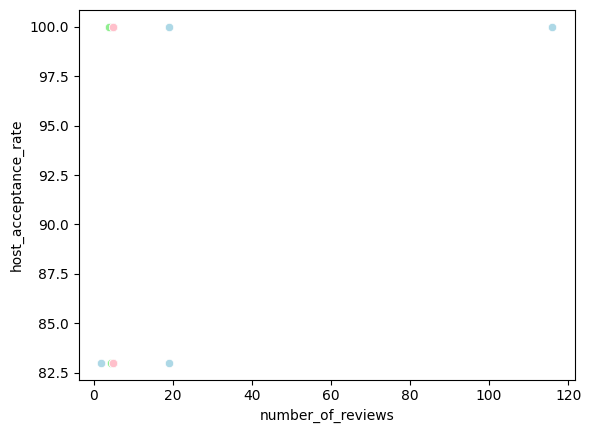

In [99]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)

In [100]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0]]]
Var_Dep= y

In [101]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [102]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [103]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [104]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[  1.        , -70.38043478, 940.2173913 ]]),
 'rank_': 3,
 'singular_': array([8.99931992e+01, 4.09516935e-01, 8.48760554e-03]),
 'intercept_': array([-4268.18478261])}

####**Modelo matemático**

Modelo matemático: y=  1x1 + -70.38043478x2 + 940.2173913x3 + -4268.18478261

In [105]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0]]])
y_pred

array([[100.],
       [100.],
       [ 83.],
       [ 83.]])

In [106]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],y.columns[0],'Predicciones']]


<ipython-input-106-d9a4cba03580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,review_scores_cleanliness,review_scores_communication,host_acceptance_rate,Predicciones
7,19.0,5.00,5.00,100.0,100.0
1575,116.0,3.84,4.81,100.0,100.0
2049,19.0,4.44,4.94,83.0,83.0
4014,2.0,5.00,5.00,83.0,83.0


<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

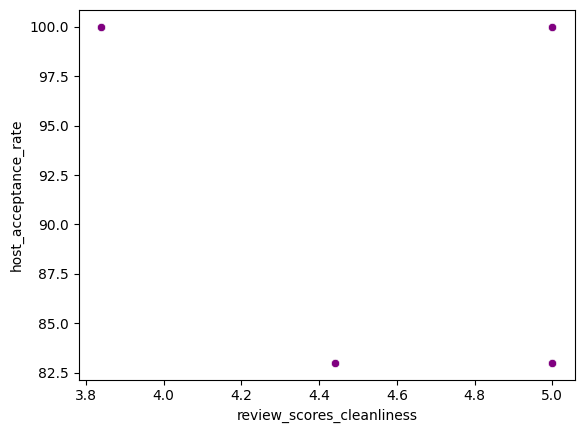

In [107]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [108]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4)

In [109]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

1.0

In [110]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

1.0

##**Tabla de Coeficientes**

In [111]:
tabla=pd.DataFrame()

In [112]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Private Room','Private Room','Private Room']

In [113]:
tabla['Tipo Habitación'] = tipo
tabla['X1'] = x1_e
tabla['X2'] = x2_e
tabla['X3'] = x3_e
tabla['X4'] = x4_e
tabla['Y'] = y_e  
tabla['Coef Determinación'] = deter_e
tabla['Coef Correlación'] = corr_e

In [114]:
tabla

,Tipo Habitación,X1,X2,X3,X4,Y,Coef Determinación,Coef Correlación
0,Entire home/apt,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,0.421494,0.649226
1,Entire home/apt,availability_365,host_response_rate,number_of_reviews,accommodates,price,0.023032,0.151762
2,Entire home/apt,number_of_reviews,review_scores_cleanliness,review_scores_communication,--,host_acceptance_rate,0.060977,0.246935
3,Private Room,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,1.000000,1.000000
4,Private Room,availability_365,host_response_rate,number_of_reviews,accommodates,price,1.000000,1.000000
5,Private Room,number_of_reviews,review_scores_cleanliness,review_scores_communication,--,host_acceptance_rate,1.000000,1.000000
